In [5]:
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization

In [ ]:
#CNN KIT

def feature_scailing(train, test):	return (train / 255.0), (test / 255.0)

#Single Convloution & MaxPooling Layer Without Batch Normalizing Layers
def CNN_model1():
  model = Sequential()
  #Relu Activation Function at Non-Output Layers to Improve Performance
  #         Filter no, size                     , Filter Random Distribution type, Input Image Dimensions
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  #       Max Pooling grid size
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  #Dense Layer:   Nodes Number
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  #SoftMax Activation Function at Output Layer to Classify Input
  #Output Layer:  Classes Number
  model.add(Dense(10, activation='softmax'))
  #Optmizer Type:Gradient Descent With Momentum, Learning Rate, Optimizer Acceleration
  opt = SGD(lr=0.01, momentum=0.9)
  #                            Cost Function                    Evalution Functions For Results Measurment
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

#Single Convloution & MaxPooling Layer With Batch Normalizing Layers
def CNN_model2():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  #Normalize Convolution Output for better Performance(Decrease Iterations Required for Convergance, Avoid Overflow, etc.)
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dense(10, activation='softmax'))
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

#We Stopped Using Batch Normlizer As it Didn't Improve Time Performance As we wished but in Contradiction 
#Added Performance Time Overhead without any Advantage also Decreased Average Accuracy
#Single Convloution & MaxPooling Layer Without Batch Normalizing Layers with Different Filter size 
def CNN_model3():
  model = Sequential()
  model.add(Conv2D(32, (4, 4), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

#From Three Last Models models without batch normaliztion were accurate & faster so We Will Build Next Architectures Based on Them
#Multi Convloution & Single MaxPooling Layer Without Batch Normalizing Layers
def CNN_model4():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

#Since Adding one Convolution Layer Improved Accuracy
#Multi Convloution & Multi MaxPooling Layer Without Batch Normalizing Layers
def CNN_model5():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Apply Model on Different Train-Test Regions of Data Using K Folding
def apply_model(CNN_model, dataX, dataY, n_folds = 10):
	accurcies, information = list(), list()
	#                                     Save state or Seed to give same results
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	for train_indc, test_indc in kfold.split(dataX):
		model = CNN_model()
		trainX, trainY, testX, testY = dataX[train_indc], dataY[train_indc], dataX[test_indc], dataY[test_indc]
		#                         parameters update num,not full batch, Data to Apply metrics on it   
		fold_info = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
		_, acc = model.evaluate(testX, testY, verbose=1)
		print('> %.3f' % (acc * 100.0))
		accurcies.append(acc)
		information.append(fold_info)
	return accurcies, information

def debugging_visualiztion(accuracies, information):
  pyplot.subplot(2, 1, 1)
  pyplot.title('Cross Entropy Cost Function')
  pyplot.subplot(2, 1, 2)
  pyplot.title('Accuracy')
  for i in range(len(information)) :
    pyplot.subplot(2, 1, 1)
    pyplot.plot(information[i].history['loss'], color='black', label='train')
    pyplot.plot(information[i].history['val_loss'], color='red', label='test')
    pyplot.subplot(2, 1, 2)
    pyplot.plot(information[i].history['accuracy'], color='black', label='train')
    pyplot.plot(information[i].history['val_accuracy'], color='red', label='test')
  pyplot.show()
  print('Average Accuracy: ', np.mean(accuracies)*100)
 
def validate_model_on_data(model, trainX, trainY, testX, testY):
  accuracies , information = apply_model(model, trainX, trainY, 5)
  debugging_visualiztion(accuracies, information)

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


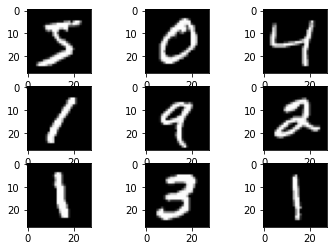

In [124]:
#Data
(trainX, trainy), (testX, testy) = mnist.load_data()
# Check If Data Size is 28 x 28 x 60000 as Mentioned in Task Description
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# Show Data Examples to make sure
for i in range(9):
  #3 x 3 grid & it's subplot index is i + 1 as it's 1 based index in matlab
	pyplot.subplot(3,3,1 + i)
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [125]:
#Add Another Dimension to Features to suite Keras Model Fit Protocol
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX  = testX.reshape((testX.shape[0], 28, 28, 1))
#Put Output Examples in form [0,1,0,0,0,0,0,0,0,0]
trainy = to_categorical(trainy)
testy  = to_categorical(testy)
#scailing
trainX , testX = feature_scailing(trainX, testX)

Epoch 1/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.3273 - accuracy: 0.8968 - val_loss: 0.0903 - val_accuracy: 0.9729
Epoch 2/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0615 - accuracy: 0.9806 - val_loss: 0.0666 - val_accuracy: 0.9801
Epoch 3/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0351 - accuracy: 0.9900 - val_loss: 0.0657 - val_accuracy: 0.9816
Epoch 4/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0259 - accuracy: 0.9926 - val_loss: 0.0615 - val_accuracy: 0.9818
Epoch 5/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0140 - accuracy: 0.9964 - val_loss: 0.0597 - val_accuracy: 0.9821
Epoch 6/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.0105 - accuracy: 0.9977 - val_loss: 0.0584 - val_accuracy: 0.9839
Epoch 7/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.0068 - accuracy: 0.9984 - val_loss: 0.0633 -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:109: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


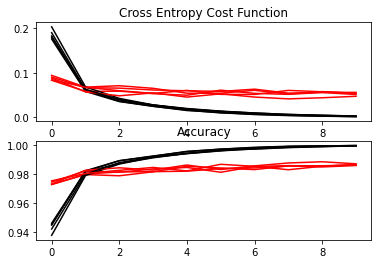

Average Accuracy:  98.65000009536743


In [127]:
validate_model_on_data(CNN_model1, trainX, trainy, testX, testy)

Epoch 1/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2505 - accuracy: 0.9229 - val_loss: 0.0692 - val_accuracy: 0.9792
Epoch 2/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0547 - accuracy: 0.9845 - val_loss: 0.0664 - val_accuracy: 0.9809
Epoch 3/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.0325 - accuracy: 0.9908 - val_loss: 0.0574 - val_accuracy: 0.9838
Epoch 4/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0194 - accuracy: 0.9945 - val_loss: 0.0520 - val_accuracy: 0.9853
Epoch 5/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0133 - accuracy: 0.9965 - val_loss: 0.0509 - val_accuracy: 0.9854
Epoch 6/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0110 - accuracy: 0.9971 - val_loss: 0.0532 - val_accuracy: 0.9858
Epoch 7/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0070 - accuracy: 0.9983 - val_loss: 0.0596 -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:110: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


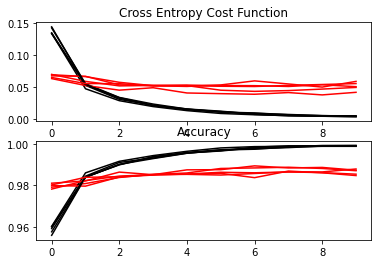

Average Accuracy:  98.64999890327454


In [102]:
validate_model_on_data(CNN_model2, trainX, trainy, testX, testy)

Epoch 1/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.3537 - accuracy: 0.8887 - val_loss: 0.0860 - val_accuracy: 0.9751
Epoch 2/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0679 - accuracy: 0.9794 - val_loss: 0.0653 - val_accuracy: 0.9805
Epoch 3/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0413 - accuracy: 0.9869 - val_loss: 0.0637 - val_accuracy: 0.9812
Epoch 4/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0496 - val_accuracy: 0.9847
Epoch 5/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0140 - accuracy: 0.9962 - val_loss: 0.0507 - val_accuracy: 0.9849
Epoch 6/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0113 - accuracy: 0.9966 - val_loss: 0.0525 - val_accuracy: 0.9847
Epoch 7/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0079 - accuracy: 0.9983 - val_loss: 0.0535 -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:110: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


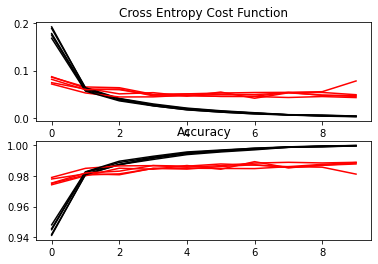

Average Accuracy:  98.68833303451538


In [103]:
validate_model_on_data(CNN_model3, trainX, trainy, testX, testy)

Epoch 1/10
1500/1500 [==============================] - 85s 56ms/step - loss: 0.3022 - accuracy: 0.9051 - val_loss: 0.0781 - val_accuracy: 0.9766
Epoch 2/10
1500/1500 [==============================] - 84s 56ms/step - loss: 0.0478 - accuracy: 0.9852 - val_loss: 0.0547 - val_accuracy: 0.9837
Epoch 3/10
1500/1500 [==============================] - 85s 56ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.0531 - val_accuracy: 0.9837
Epoch 4/10
1500/1500 [==============================] - 85s 57ms/step - loss: 0.0176 - accuracy: 0.9942 - val_loss: 0.0569 - val_accuracy: 0.9850
Epoch 5/10
1500/1500 [==============================] - 87s 58ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.0526 - val_accuracy: 0.9868
Epoch 6/10
1500/1500 [==============================] - 85s 57ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.0639 - val_accuracy: 0.9843
Epoch 7/10
1500/1500 [==============================] - 84s 56ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0597 -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:110: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


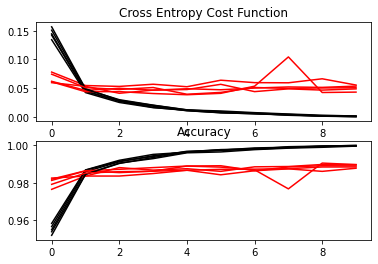

Average Accuracy:  98.89833450317383


In [104]:
validate_model_on_data(CNN_model4, trainX, trainy, testX, testy)

Epoch 1/10
1500/1500 [==============================] - 68s 45ms/step - loss: 0.2916 - accuracy: 0.9109 - val_loss: 0.0696 - val_accuracy: 0.9787
Epoch 2/10
1500/1500 [==============================] - 68s 45ms/step - loss: 0.0477 - accuracy: 0.9853 - val_loss: 0.0499 - val_accuracy: 0.9839
Epoch 3/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0292 - accuracy: 0.9912 - val_loss: 0.0416 - val_accuracy: 0.9884
Epoch 4/10
1500/1500 [==============================] - 69s 46ms/step - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.0441 - val_accuracy: 0.9881
Epoch 5/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0156 - accuracy: 0.9953 - val_loss: 0.0544 - val_accuracy: 0.9868
Epoch 6/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0117 - accuracy: 0.9966 - val_loss: 0.0436 - val_accuracy: 0.9891
Epoch 7/10
1500/1500 [==============================] - 67s 45ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0594 -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


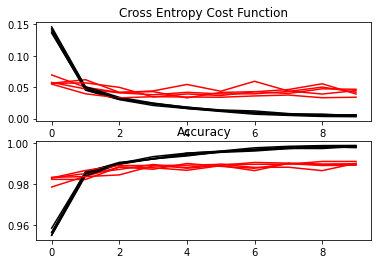

Average Accuracy:  99.01166677474976


In [111]:
validate_model_on_data(CNN_model5, trainX, trainy, testX, testy)

Epoch 1/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2600 - accuracy: 0.9160 - val_loss: 0.0615 - val_accuracy: 0.9800
Epoch 2/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0418 - accuracy: 0.9864 - val_loss: 0.0366 - val_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.0268 - val_accuracy: 0.9911
Epoch 4/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.0311 - val_accuracy: 0.9904
Epoch 5/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.0235 - val_accuracy: 0.9928
Epoch 6/10
1875/1875 [==============================] - 85s 46ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.0233 - val_accuracy: 0.9932
Epoch 7/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0251 -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:109: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


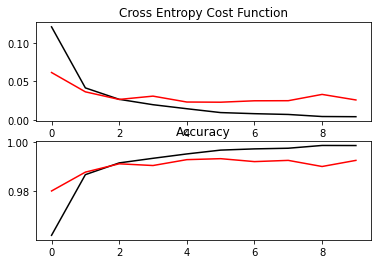

Average Accuracy:  99.25000071525574


In [117]:
#Since Last Model Architecture Resulted Highest Average Accuracy We will Use it
#To Train on Whole Training Data & Evaluate Actual Testing Data 
best_model = CNN_model5()
information = best_model.fit(trainX, trainy, epochs=10, batch_size=32, validation_data=(testX, testy), verbose=1)
_, acc = best_model.evaluate(testX, testy, verbose=1)
debugging_visualiztion([acc], [information])